In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import albumentations as A

2023-09-22 22:05:06.683239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv("train.csv")

In [4]:
tf.config.list_physical_devices('GPU')

2023-09-22 22:05:11.139040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 22:05:11.184479: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 22:05:11.184624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
len(df)

10407

In [17]:
transform = A.Compose([
    A.RandomCrop(width=128, height=128),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2),
    A.Blur(p=0.2),
    A.GaussNoise(p=0.2),
    A.ToFloat(max_value=255)
])


In [7]:
df.head()

,image_id,labelt,variety,age,label
0,100330.jpg,0,ADT45,45,bacterial_leaf_blight
1,100365.jpg,0,ADT45,45,bacterial_leaf_blight
2,100382.jpg,0,ADT45,45,bacterial_leaf_blight
3,100632.jpg,0,ADT45,45,bacterial_leaf_blight
4,101918.jpg,0,ADT45,45,bacterial_leaf_blight


In [8]:
a=df["label"].unique()

In [9]:
print(a)

['bacterial_leaf_blight' 'bacterial_leaf_streak'
 'bacterial_panicle_blight' 'blast' 'brown_spot' 'dead_heart'
 'downy_mildew' 'hispa' 'normal' 'tungro']


In [10]:
df["labelt"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
df["labelt"]

0        0
1        0
2        0
3        0
4        0
        ..
10402    9
10403    9
10404    9
10405    9
10406    9
Name: labelt, Length: 10407, dtype: int64

In [12]:
a=df["label"].unique()
a

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['variety']= label_encoder.fit_transform(df['variety'])
df

,image_id,labelt,variety,age,label
0,100330.jpg,0,0,45,bacterial_leaf_blight
1,100365.jpg,0,0,45,bacterial_leaf_blight
2,100382.jpg,0,0,45,bacterial_leaf_blight
3,100632.jpg,0,0,45,bacterial_leaf_blight
4,101918.jpg,0,0,45,bacterial_leaf_blight
...,...,...,...,...,...
10402,107607.jpg,9,9,55,tungro
10403,107811.jpg,9,9,55,tungro
10404,108547.jpg,9,9,55,tungro
10405,110245.jpg,9,9,55,tungro


In [14]:
obj={"img":[], "label":[],"variety":[],"age":[]}
for i in range(len(df)):
    path = os.path.join("train_images", df["label"][i])
    path = os.path.join(path, df["image_id"][i])
    try:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)
        obj["img"].append(img)
        obj["label"].append(df["labelt"][i])
        obj["variety"].append(df["variety"][i])
        obj["age"].append(df["age"][i])
    except:
        continue

In [18]:
def agu(img):
    return transform(image=img)["image"]
for i in range(len(obj["img"])):
    obj["img"].append(agu(obj["img"][i]))
    obj["label"].append(obj["label"][i])
    obj["variety"].append(obj["variety"][i])
    obj["age"].append(obj["age"][i])
    


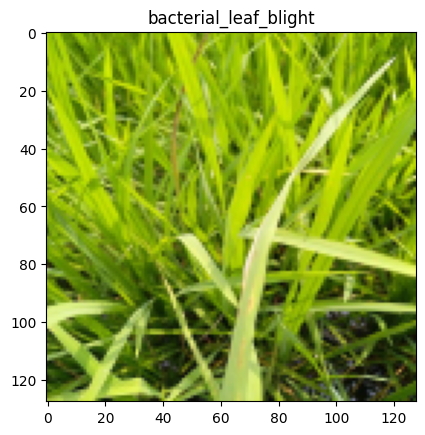

In [ ]:
plt.imshow(obj["img"][0])
plt.title(a[obj["label"][2044]])
plt.show()


In [20]:
with tf.device('/gpu:0'):
    model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(256,256,3)),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax'),
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    
                     

2023-09-22 22:06:44.710642: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 22:06:44.710807: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-22 22:06:44.710896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [21]:
with tf.device('/gpu:0'):
    base_model = tf.keras.applications.ResNet50(input_shape=(128,128, 3), include_top=False, weights=None)
    img = tf.keras.layers.Input(shape=(128,128,3))
    x = base_model(img)
    x=tf.keras.layers.Flatten()(x)
    y = tf.keras.layers.Dense(128, activation='relu')(x)
    y = tf.keras.layers.Dropout(0.2)(y)
    y=tf.keras.layers.Dense(10,activation='softmax')(y)
    model = tf.keras.Model(inputs=[img], outputs=y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

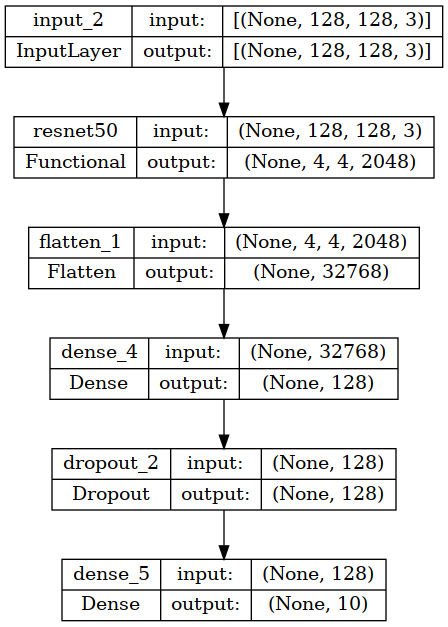

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [62]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               4194432   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 27783434 (105.99 MB)
Trainable params: 277303

In [23]:
obj["age"]=np.array(obj["age"])
obj["variety"]=np.array(obj["variety"])
obj["label"]=np.array(obj["label"])

In [24]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
obj['variety']= label_encoder.fit_transform(obj['variety'])
  
obj['variety']

array([0, 0, 0, ..., 9, 9, 9])

In [25]:
obj["img"]=np.array(obj["img"])
obj["img"].shape

(20814, 128, 128, 3)

In [26]:
obj['variety']=np.array(obj['variety'])
obj['variety'].shape


(20814,)

In [27]:
obj["age"]=np.array(obj["age"])
obj["age"].shape

(20814,)

In [29]:
ret= model.fit(x=obj["img"],y=obj["label"], epochs=37, batch_size=50, verbose=1,callbacks=tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True,monitor='val_loss',mode='min'))

2023-09-22 22:10:40.735324: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4092198912 exceeds 10% of free system memory.
2023-09-22 22:10:54.065997: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.81GiB (rounded to 4092198912)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-09-22 22:10:54.067131: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-09-22 22:10:54.067394: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 89, Chunks in use: 89. 22.2KiB allocated for chunks. 22.2KiB in use in bin. 9.3KiB client-requested in use in bin.
2023-09-22 22:10:54.067477: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 42, Chunks in use: 42. 21

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
ret.history.keys()


In [ ]:
plt.plot(ret.history['accuracy'])
plt.plot(ret.history['val_accuracy'])

In [72]:
score = model.evaluate(obj["img"], obj["label"], verbose=1)

326/326 [==============================] - 9s 24ms/step - loss: 0.6357 - accuracy: 0.7881


In [ ]:
model.save("model.h5")

In [73]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(obj["img"])
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = obj["label"]
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")


: 

In [59]:
a[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
j=0
for i in range(len(a)):
   if np.argmax(a[i])==obj["label"][i]:
       j+=1

In [32]:
j/len(a)

0.10108580762948016

In [5]:
model=tf.keras.models.load_model("resnet.h5")